# Single Knapsack

In [ ]:
!pip install pulp pyomo gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00


## Generate Knapsack

In [ ]:
import numpy as np

def generate_knapsack(n_items, max_weight=100, max_value=100):
    weights = np.random.randint(1, max_weight, size=n_items)
    values = np.random.randint(1, max_value, size=n_items)
    capacity = int(0.5 * sum(weights))  # Capacity is 50% of total weights
    return weights, values, capacity


## Scipy

In [ ]:
from scipy.optimize import linprog

def solve_knapsack_scipy(weights, values, capacity):
    n = len(weights)
    c = -values  # Maximizing values is equivalent to minimizing -values
    A = [weights]
    b = [capacity]
    bounds = [(0, 1) for _ in range(n)]
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})
    return res


## PuLP

In [ ]:
import pulp

def solve_knapsack_pulp(weights, values, capacity):
    n = len(weights)
    prob = pulp.LpProblem("Knapsack", pulp.LpMaximize)
    x = [pulp.LpVariable(f'x{i}', cat='Binary') for i in range(n)]

    prob += pulp.lpSum([values[i] * x[i] for i in range(n)])
    prob += pulp.lpSum([weights[i] * x[i] for i in range(n)]) <= capacity

    prob.solve()
    return prob


## Gekko

In [ ]:
from gekko import GEKKO

def solve_knapsack_gekko(weights, values, capacity):
    m = GEKKO(remote=False)
    n = len(weights)
    x = [m.Var(integer=True, lb=0, ub=1) for _ in range(n)]

    m.Maximize(m.sum([values[i] * x[i] for i in range(n)]))
    m.Equation(m.sum([weights[i] * x[i] for i in range(n)]) <= capacity)

    m.options.SOLVER = 1  # APOPT
    m.solve(disp=False)
    return m


## Pyomo

In [ ]:
from pyomo.environ import ConcreteModel, Var, Binary, Objective, Constraint, SolverFactory

def solve_knapsack_pyomo(weights, values, capacity):
    n = len(weights)
    model = ConcreteModel()
    model.Items = range(n)
    model.x = Var(model.Items, within=Binary)

    model.Objective = Objective(expr=sum(values[i] * model.x[i] for i in model.Items), sense=1)
    model.Constraint = Constraint(expr=sum(weights[i] * model.x[i] for i in model.Items) <= capacity)

    solver = SolverFactory('glpk')  # Ensure GLPK is installed
    solver.solve(model, tee=False)
    return model


In [ ]:
import time

def measure_solver_time(solver_func, weights, values, capacity):
    start_time = time.time()
    solver_func(weights, values, capacity)
    end_time = time.time()
    return end_time - start_time


In [ ]:
import matplotlib.pyplot as plt

# Define problem sizes
problem_sizes = [n for n in range(100,1000)]

# Initialize dictionaries to store times
times_scipy = []
times_pulp = []
times_gekko = []
times_pyomo = []

for size in problem_sizes:
    weights, values, capacity = generate_knapsack(size)
    print(size)
    # Measure SciPy
    try:
        time_scipy = measure_solver_time(solve_knapsack_scipy, weights, values, capacity)
    except Exception as e:
        print(f"SciPy failed for size {size}: {e}")
        time_scipy = None
    times_scipy.append(time_scipy)

    # Measure PuLP
    try:
        time_pulp = measure_solver_time(solve_knapsack_pulp, weights, values, capacity)
    except Exception as e:
        print(f"PuLP failed for size {size}: {e}")
        time_pulp = None
    times_pulp.append(time_pulp)

    # Measure Gekko
    try:
        time_gekko = measure_solver_time(solve_knapsack_gekko, weights, values, capacity)
    except Exception as e:
        print(f"Gekko failed for size {size}: {e}")
        time_gekko = None
    times_gekko.append(time_gekko)


100


<ipython-input-17-56d70216381e>:9: OptimizeWarning: Unrecognized options detected: {'integrality': 1}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})


101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350


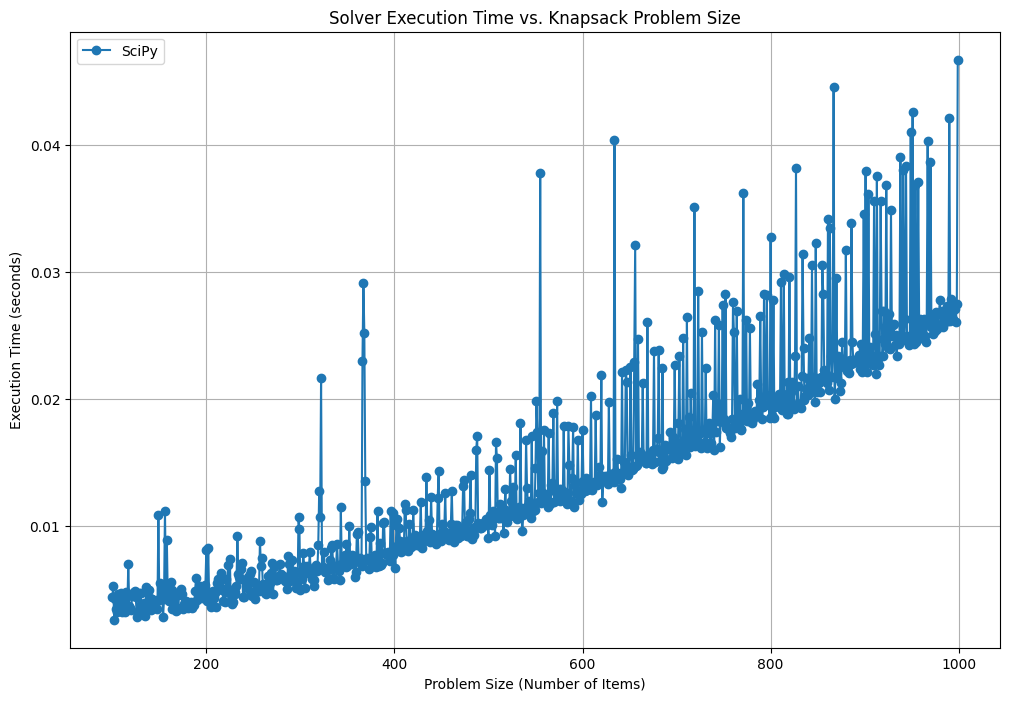

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(problem_sizes, times_scipy, marker='o', label='SciPy')
# plt.plot(problem_sizes, times_pulp, marker='s', label='PuLP')
# plt.plot(problem_sizes, times_gekko, marker='^', label='Gekko')
plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Solver Execution Time vs. Knapsack Problem Size')
plt.legend()
plt.grid(True)
plt.show()


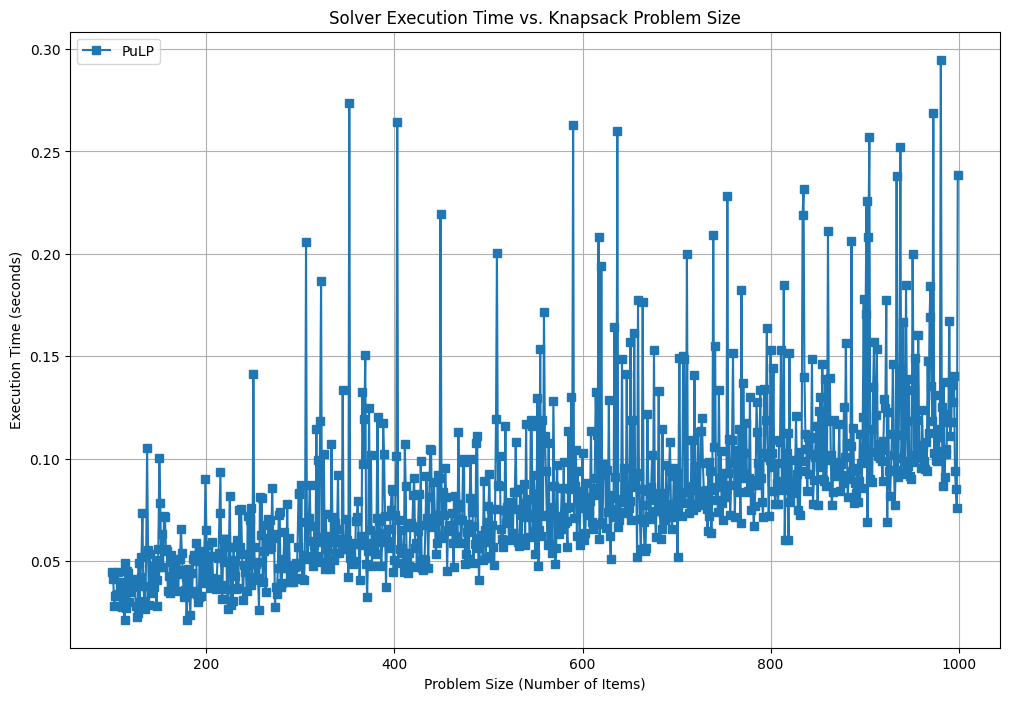

In [ ]:
plt.figure(figsize=(12, 8))
# plt.plot(problem_sizes, times_scipy, marker='o', label='SciPy')
plt.plot(problem_sizes, times_pulp, marker='s', label='PuLP')
# plt.plot(problem_sizes, times_gekko, marker='^', label='Gekko')
plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Solver Execution Time vs. Knapsack Problem Size')
plt.legend()
plt.grid(True)
plt.show()


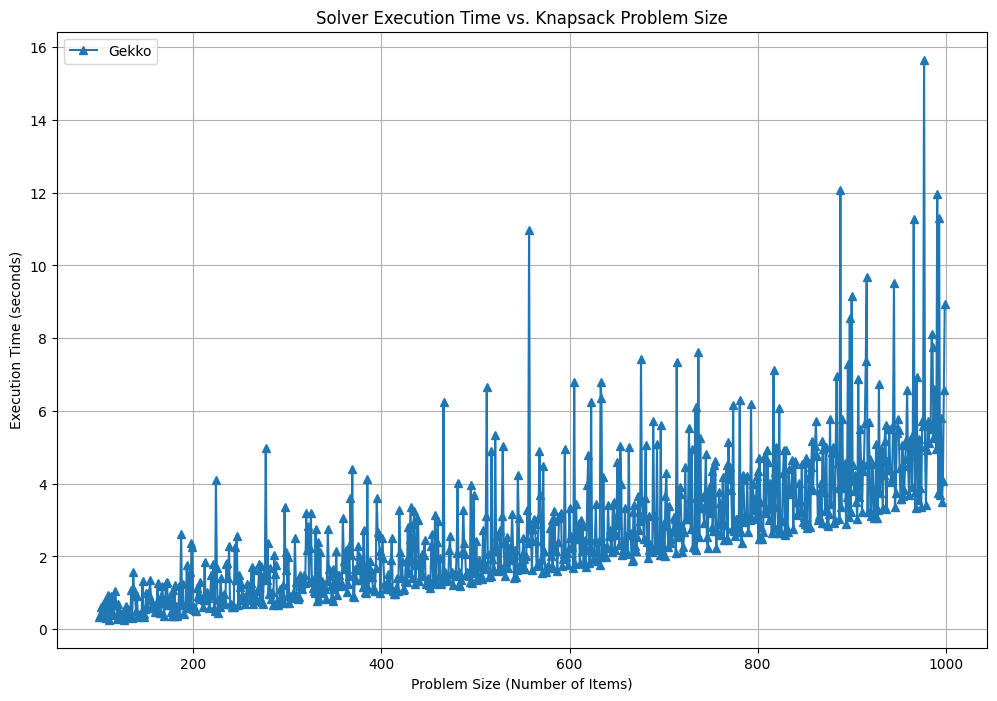

In [ ]:
plt.figure(figsize=(12, 8))
# plt.plot(problem_sizes, times_scipy, marker='o', label='SciPy')
# plt.plot(problem_sizes, times_pulp, marker='s', label='PuLP')
plt.plot(problem_sizes, times_gekko, marker='^', label='Gekko')
plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Solver Execution Time vs. Knapsack Problem Size')
plt.legend()
plt.grid(True)
plt.show()


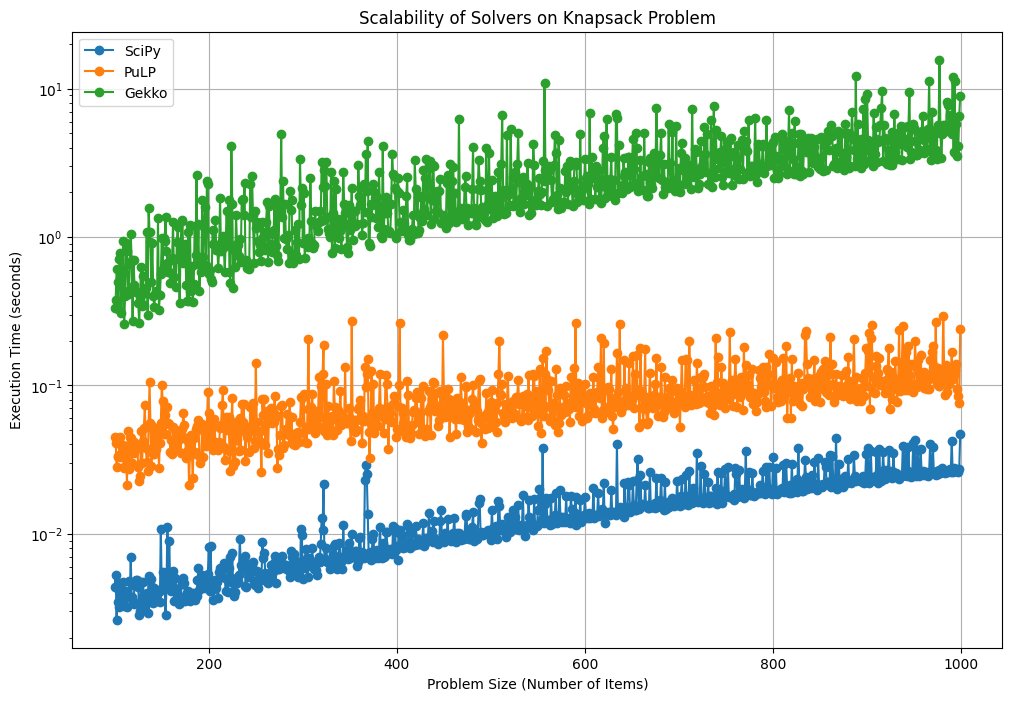

In [ ]:
plt.figure(figsize=(12, 8))
for solver, times in zip(['SciPy', 'PuLP', 'Gekko'], [times_scipy, times_pulp, times_gekko]):
    plt.plot(problem_sizes, times, marker='o', label=solver)

plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability of Solvers on Knapsack Problem')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale if execution times vary widely
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define problem sizes
problem_sizes = range(50, 1001, 50)

# Initialize dictionaries to store times
times_scipy = []
times_pulp = []
times_gekko = []

for size in problem_sizes:
    weights, values, capacity = generate_knapsack(size)
    print(size)
    # Measure SciPy
    try:
        time_scipy = measure_solver_time(solve_knapsack_scipy, weights, values, capacity)
    except Exception as e:
        print(f"SciPy failed for size {size}: {e}")
        time_scipy = None
    times_scipy.append(time_scipy)

    # Measure PuLP
    try:
        time_pulp = measure_solver_time(solve_knapsack_pulp, weights, values, capacity)
    except Exception as e:
        print(f"PuLP failed for size {size}: {e}")
        time_pulp = None
    times_pulp.append(time_pulp)

    # Measure Gekko
    try:
        time_gekko = measure_solver_time(solve_knapsack_gekko, weights, values, capacity)
    except Exception as e:
        print(f"Gekko failed for size {size}: {e}")
        time_gekko = None
    times_gekko.append(time_gekko)


10
20


<ipython-input-11-56d70216381e>:9: OptimizeWarning: Unrecognized options detected: {'integrality': 1}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})


50
100
200
500
1000
2000
5000


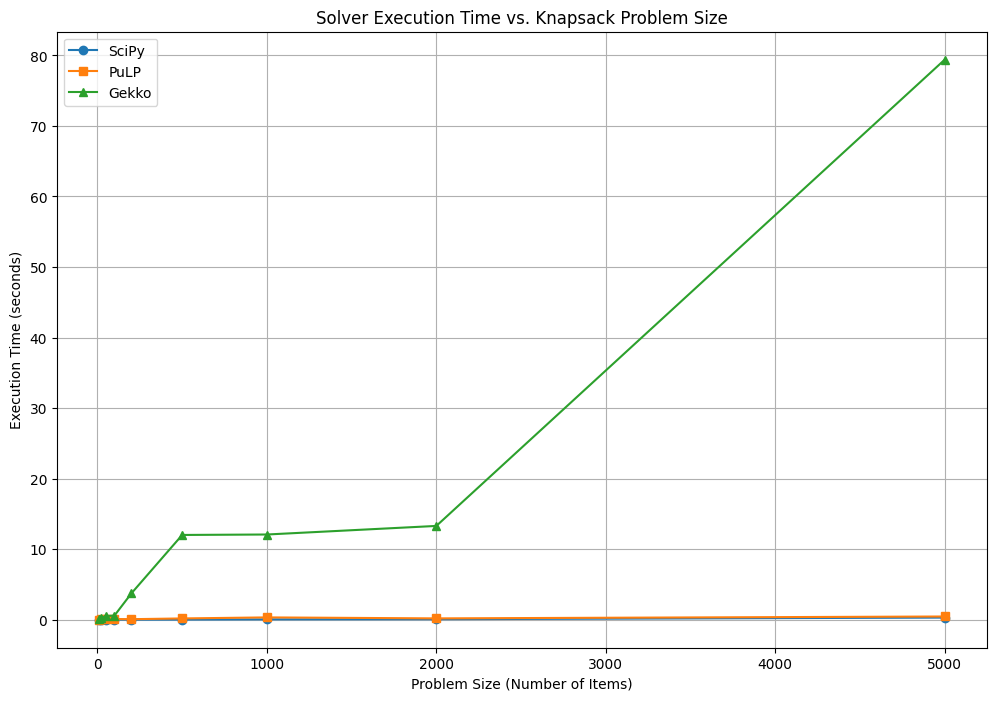

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(problem_sizes, times_scipy, marker='o', label='SciPy')
plt.plot(problem_sizes, times_pulp, marker='s', label='PuLP')
plt.plot(problem_sizes, times_gekko, marker='^', label='Gekko')
plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Solver Execution Time vs. Knapsack Problem Size')
plt.legend()
plt.grid(True)
plt.show()


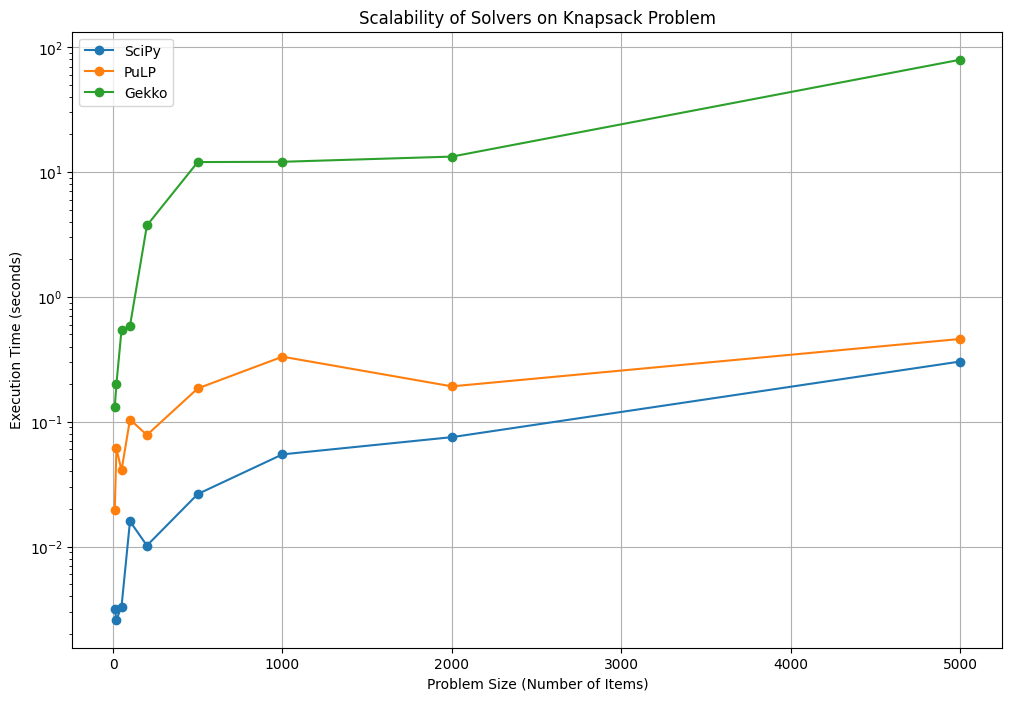

In [ ]:
plt.figure(figsize=(12, 8))
for solver, times in zip(['SciPy', 'PuLP', 'Gekko'], [times_scipy, times_pulp, times_gekko]):
    plt.plot(problem_sizes, times, marker='o', label=solver)

plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability of Solvers on Knapsack Problem')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale if execution times vary widely
plt.show()


# Multiple Knapsack problem

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpStatus, value
from gekko import GEKKO

# Function to generate synthetic items (values and weights)
def generate_knapsack_problem(num_items):
    values = np.random.randint(1, 100, size=num_items)
    weights = np.random.randint(1, 50, size=num_items)
    return values, weights

# Function to generate capacities for knapsacks
def generate_knapsack_capacities(num_knapsacks, weights, equal_capacity=True):
    a=int(0.5 * sum(weights))
    l=int(0.2 * sum(weights))
    u=int(0.8 * sum(weights))
    if equal_capacity:
        return [a] * num_knapsacks  # Equal capacity for all knapsacks
    else:
        return np.random.randint(l, u, size=num_knapsacks).tolist()  # Different capacities

# Define the number of items and knapsacks for each test
num_items_list = range(50, 1001, 50)
num_knapsacks_list = [1,3, 5, 10]


In [ ]:
import numpy as np
from scipy.optimize import linprog
import time

def solve_with_scipy(values, weights, capacities):
    num_items = len(values)
    num_knapsacks = len(capacities)

    # Set up the linear programming model
    c = -np.tile(values, num_knapsacks)  # Repeat values for each knapsack (for maximization, negated for linprog)

    # Constraints for item assignment and knapsack capacity
    A_eq = np.zeros((num_items, num_items * num_knapsacks))
    A_ub = np.zeros((num_knapsacks, num_items * num_knapsacks))

    # Each item can only be placed in one knapsack
    for i in range(num_items):
        A_eq[i, i::num_items] = 1  # Ensure each item is assigned to exactly one knapsack

    # Weight capacity constraints for each knapsack
    for j in range(num_knapsacks):
        A_ub[j, j * num_items:(j + 1) * num_items] = weights

    # Upper bound: capacity constraints
    b_ub = capacities
    # Equality bound: each item can only go in one knapsack
    b_eq = np.ones(num_items)

    # Bounds: Each variable is binary (0 or 1)
    bounds = [(0, 1)] * (num_items * num_knapsacks)

    # Solve the problem and record time
    start_time = time.time()
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    end_time = time.time()

    # Output solution time and optimal value
    return end_time - start_time


In [ ]:
def solve_with_pulp(values, weights, capacities):
    num_items = len(values)
    num_knapsacks = len(capacities)

    # Create a PuLP problem
    prob = LpProblem("MKP", LpMaximize)

    # Decision variables: x[i][j] = 1 if item i is placed in knapsack j
    x = [[LpVariable(f"x_{i}_{j}", cat='Binary') for j in range(num_knapsacks)] for i in range(num_items)]

    # Objective function: Maximize the total value
    prob += lpSum(x[i][j] * values[i] for i in range(num_items) for j in range(num_knapsacks))

    # Constraint: Each item can be in at most one knapsack
    for i in range(num_items):
        prob += lpSum(x[i][j] for j in range(num_knapsacks)) <= 1

    # Constraints: Weight in each knapsack should not exceed its capacity
    for j in range(num_knapsacks):
        prob += lpSum(x[i][j] * weights[i] for i in range(num_items)) <= capacities[j]

    # Solve the problem and record the time
    start_time = time.time()
    prob.solve()
    end_time = time.time()

    return end_time - start_time


In [ ]:
def solve_with_gekko(values, weights, capacities):
    num_items = len(values)
    num_knapsacks = len(capacities)

    # Create Gekko model
    m = GEKKO(remote=False)

    # Decision variables
    x = [[m.Var(value=0, lb=0, ub=1, integer=True) for j in range(num_knapsacks)] for i in range(num_items)]

    # Objective: Maximize total value
    m.Maximize(m.sum([x[i][j] * values[i] for i in range(num_items) for j in range(num_knapsacks)]))

    # Constraints: Each item can only be placed in one knapsack
    for i in range(num_items):
        m.Equation(m.sum([x[i][j] for j in range(num_knapsacks)]) <= 1)

    # Capacity constraints for each knapsack
    for j in range(num_knapsacks):
        m.Equation(m.sum([x[i][j] * weights[i] for i in range(num_items)]) <= capacities[j])

    # Solve the problem and record time
    start_time = time.time()
    m.solve(disp=False)
    end_time = time.time()

    return end_time - start_time


In [ ]:
import seaborn as sns
def plot_log(df,solver_name):
  # df_=df[(df['NumKnapsacks']==numk) & (df["CapacityType"]==cap)]
  plt.figure(figsize=(10,6))
  sns.lineplot(data=df, x='NumItems', y=solver_name, hue='NumKnapsacks', style='CapacityType', markers=True)
  plt.yscale('log')
  plt.title(f"{solver_name} Solver Performance for Multiple Knapsack Problem")
  plt.xlabel("Problem Size (Number of Items)")
  plt.ylabel("Execution Time (seconds)")
  plt.show()

In [ ]:
import seaborn as sns
def plot(df,solver_name):
  # df_=df[(df['NumKnapsacks']==numk) & (df["CapacityType"]==cap)]
  plt.figure(figsize=(10,6))
  sns.lineplot(data=df, x='NumItems', y=solver_name, hue='NumKnapsacks', style='CapacityType', markers=True,palette="bright")
  plt.title(f"{solver_name} Solver Performance for Multiple Knapsack Problem")
  plt.xlabel("Problem Size (Number of Items)")
  plt.ylabel("Execution Time (seconds)")
  plt.show()

In [ ]:
# Greedy heuristic based on value-to-weight ratio
def solve_with_greedy(values, weights, capacity):
    start_time = time.time()
    items = sorted(range(len(values)), key=lambda i: values[i] / weights[i], reverse=True)
    total_value = 0
    total_weight = 0
    for i in items:
        if total_weight + weights[i] <= capacity:
            total_value += values[i]
            total_weight += weights[i]
    end_time = time.time()
    return end_time - start_time

In [ ]:
def solve_with_dynamic_programming(values, weights, capacity):
    start_time = time.time()
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    end_time = time.time()
    return end_time - start_time

In [ ]:
def solve_with_simulated_annealing(values, weights, capacity):
    start_time = time.time()

    def get_value_and_weight(solution):
        total_value = sum(v for v, s in zip(values, solution) if s)
        total_weight = sum(w for w, s in zip(weights, solution) if s)
        return total_value, total_weight

    n = len(values)
    current_solution = [random.choice([0, 1]) for _ in range(n)]
    current_value, current_weight = get_value_and_weight(current_solution)
    best_solution = current_solution[:]
    best_value = current_value

    temperature = 1000
    cooling_rate = 0.99

    while temperature > 1:
        new_solution = current_solution[:]
        index = random.randint(0, n - 1)
        new_solution[index] = 1 - new_solution[index]  # Flip bit
        new_value, new_weight = get_value_and_weight(new_solution)

        if new_weight <= capacity and (new_value > current_value or
           random.random() < np.exp((new_value - current_value) / temperature)):
            current_solution = new_solution
            current_value = new_value
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

        temperature *= cooling_rate

    end_time = time.time()
    return end_time - start_time


In [ ]:
import pandas as pd

results= []
# num_items_list=[50,100,200,500]
for num_knapsacks in num_knapsacks_list:
    print(num_knapsacks)
    for num_items in num_items_list:
        # Generate problem
        print(num_items)
        values, weights = generate_knapsack_problem(num_items)

        # Equal capacity case
        capacities_equal = generate_knapsack_capacities(num_knapsacks, weights, equal_capacity=True)
        time_pulp= solve_with_pulp(values, weights, capacities_equal)
        if num_knapsacks==1:
          time_gekko = solve_with_gekko(values, weights, capacities_equal)
        else:
          time_gekko = 0
        time_scipy = solve_with_scipy(values, weights, capacities_equal)
        time_greedy = solve_with_greedy(values, weights, capacity)
        time_dp = solve_with_dynamic_programming(values, weights, capacity)
        time_sa = solve_with_simulated_annealing(values, weights, capacity)

        results.append((num_items, num_knapsacks, 'Equal', time_scipy, time_pulp, time_gekko))

        # Different capacity case
        capacities_diff = generate_knapsack_capacities(num_knapsacks, weights, equal_capacity=False)
        time_pulp = solve_with_pulp(values, weights, capacities_diff)
        if num_knapsacks==1:
          time_gekko = solve_with_gekko(values, weights, capacities_diff)
        else:
          time_gekko = 0
        time_scipy = solve_with_scipy(values, weights, capacities_diff)

        results.append((num_items, num_knapsacks, 'Different', time_scipy, time_pulp,time_gekko))



In [ ]:
import pandas as pd

results= []
# num_items_list=[50,100,200,500]
for num_knapsacks in num_knapsacks_list:
    print(num_knapsacks)
    for num_items in num_items_list:
        # Generate problem
        print(num_items)
        values, weights = generate_knapsack_problem(num_items)

        # Equal capacity case
        capacities_equal = generate_knapsack_capacities(num_knapsacks, weights, equal_capacity=True)
        time_pulp= solve_with_pulp(values, weights, capacities_equal)
        if num_knapsacks==1:
          time_gekko = solve_with_gekko(values, weights, capacities_equal)
        else:
          time_gekko = 0
        time_scipy = solve_with_scipy(values, weights, capacities_equal)

        results.append((num_items, num_knapsacks, 'Equal', time_scipy, time_pulp, time_gekko))

        # Different capacity case
        capacities_diff = generate_knapsack_capacities(num_knapsacks, weights, equal_capacity=False)
        time_pulp = solve_with_pulp(values, weights, capacities_diff)
        if num_knapsacks==1:
          time_gekko = solve_with_gekko(values, weights, capacities_diff)
        else:
          time_gekko = 0
        time_scipy = solve_with_scipy(values, weights, capacities_diff)

        results.append((num_items, num_knapsacks, 'Different', time_scipy, time_pulp,time_gekko))



1
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
3
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
5
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
10
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [ ]:
df_results = pd.DataFrame(results, columns=['NumItems', 'NumKnapsacks', 'CapacityType', 'Scipy','Pulp','Gekko'])

In [ ]:
from google.colab import files

df_results.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
def plot(df,solver_name):
  # df_=df[(df['NumKnapsacks']==numk) & (df["CapacityType"]==cap)]
  plt.figure(figsize=(10,6))
  sns.lineplot(data=df, x='NumItems', y=solver_name, hue='NumKnapsacks', style='CapacityType', markers=True,palette="bright")
  plt.title(f"{solver_name} Solver Performance for Multiple Knapsack Problem")
  plt.xlabel("Problem Size (Number of Items)")
  plt.ylabel("Execution Time (seconds)")
  plt.show()

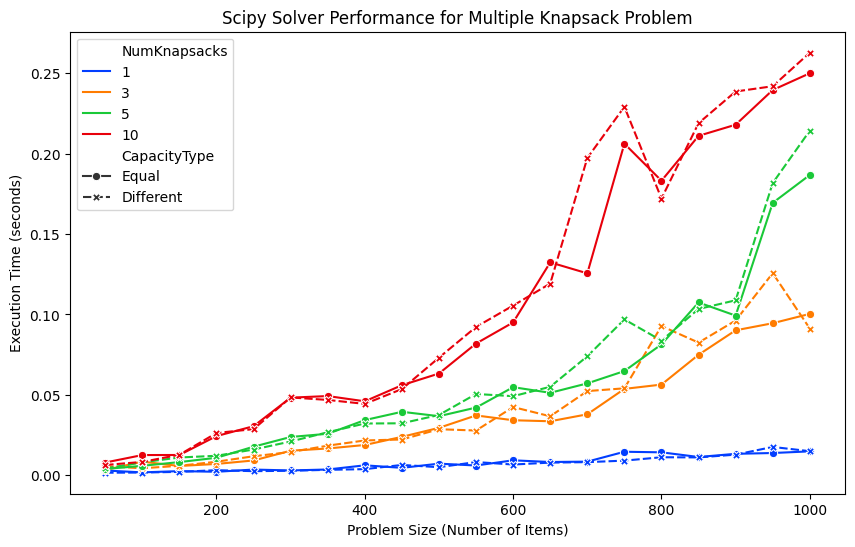

In [ ]:
plot(df_results,'Scipy')

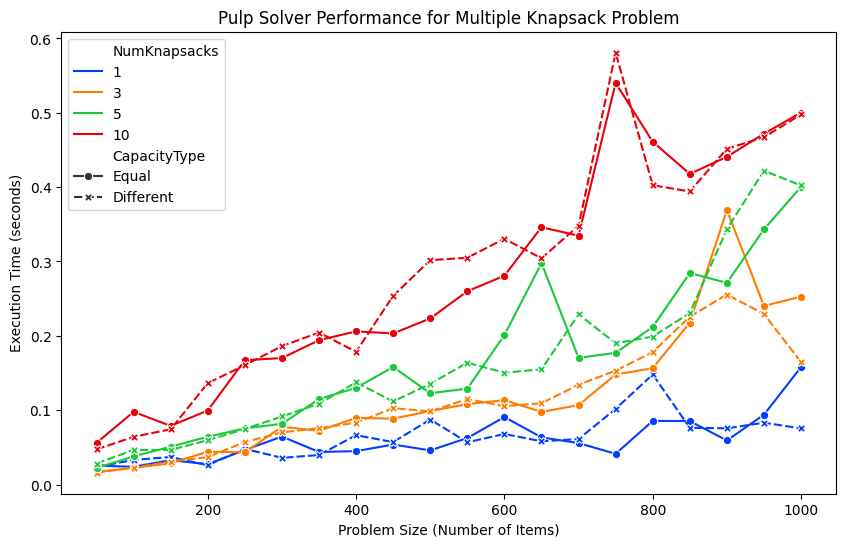

In [ ]:
plot(df_results,'Pulp')

In [ ]:
df_1=df_results[df_results['NumKnapsacks']==1]
df_3=df_results[df_results['NumKnapsacks']==3]
df_5=df_results[df_results['NumKnapsacks']==5]
df_10=df_results[df_results['NumKnapsacks']==10]

In [ ]:
df_results.head()

,NumItems,NumKnapsacks,CapacityType,Scipy,Pulp,Gekko
0,50,1,Equal,0.002966,0.025471,0.308593
1,50,1,Different,0.001596,0.023804,0.301059
2,100,1,Equal,0.001812,0.023844,0.519412
3,100,1,Different,0.001708,0.033076,0.807095
4,150,1,Equal,0.002592,0.032780,0.770921


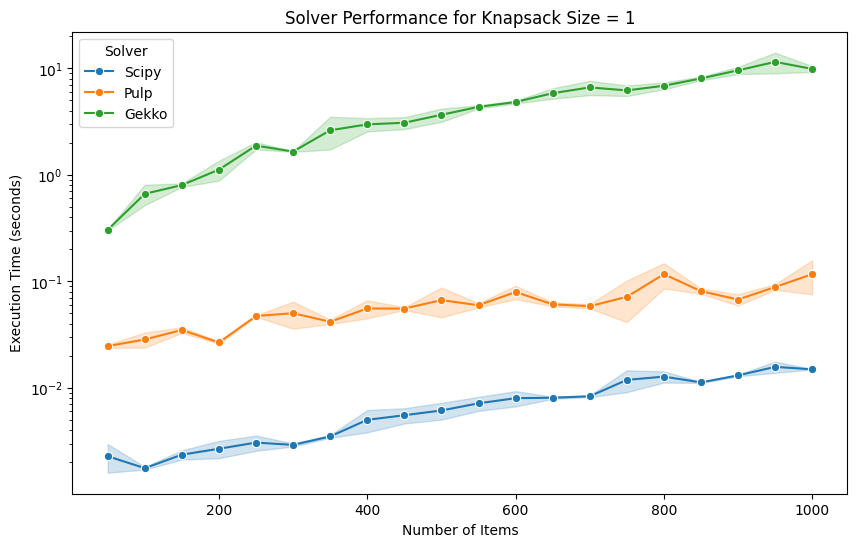

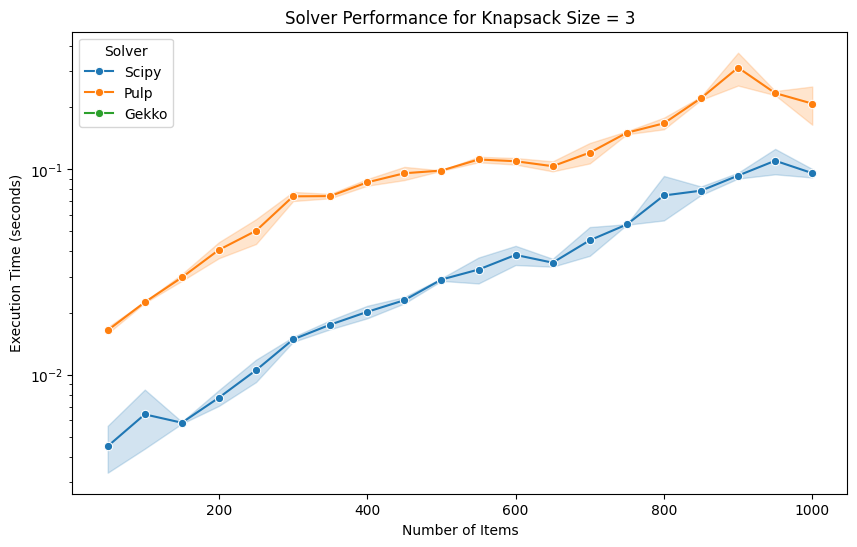

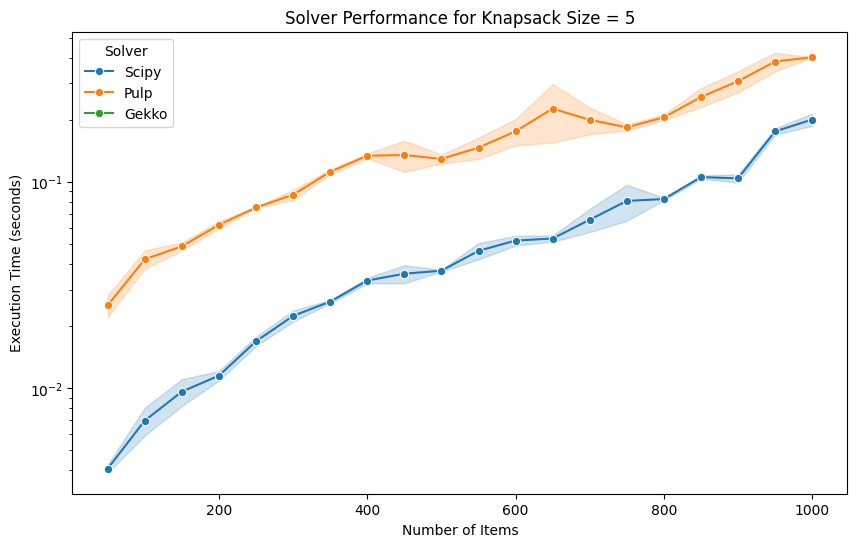

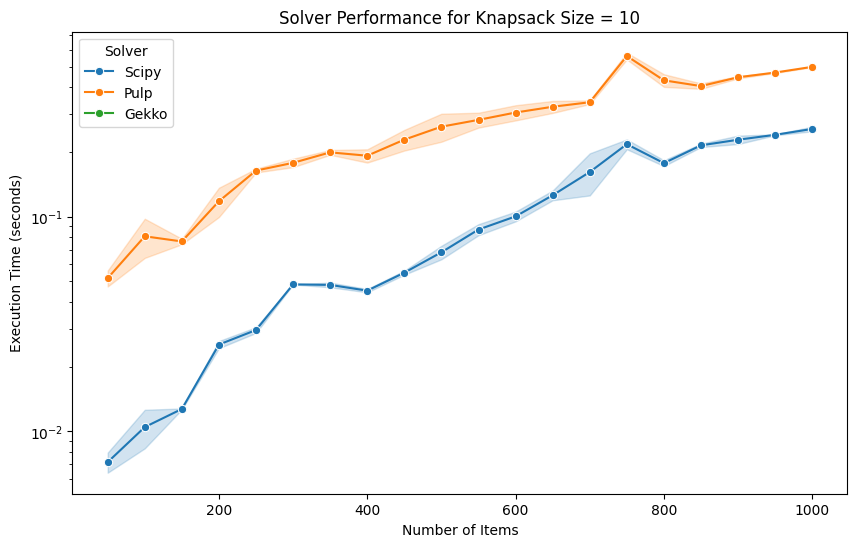

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_solver_performance(df):
    knapsack_sizes = df['NumKnapsacks'].unique()  # Get unique knapsack sizes

    for knapsack_size in knapsack_sizes:
        # Filter the dataframe for each knapsack size
        df_filtered = df[df['NumKnapsacks'] == knapsack_size]

        # Create a plot for each knapsack size
        plt.figure(figsize=(10, 6))

        # Plot each solver on the same graph
        sns.lineplot(data=df_filtered, x='NumItems', y='Scipy', label='Scipy', marker='o')
        sns.lineplot(data=df_filtered, x='NumItems', y='Pulp', label='Pulp', marker='o')
        sns.lineplot(data=df_filtered, x='NumItems', y='Gekko', label='Gekko', marker='o')

        # Set plot title and labels
        plt.title(f"Solver Performance for Knapsack Size = {knapsack_size}")
        plt.xlabel("Number of Items")
        plt.yscale('log')
        plt.ylabel("Execution Time (seconds)")
        plt.legend(title="Solver")
        plt.show()

# Example call:
plot_solver_performance(df_results)


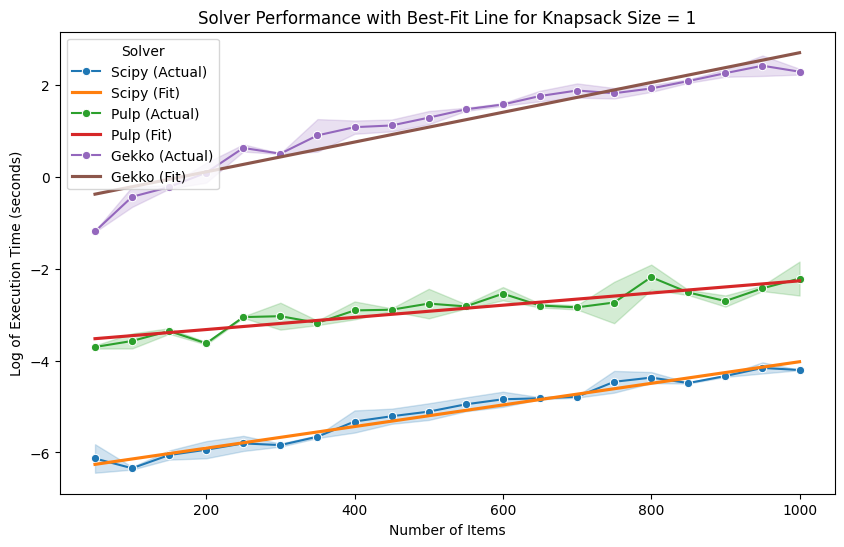

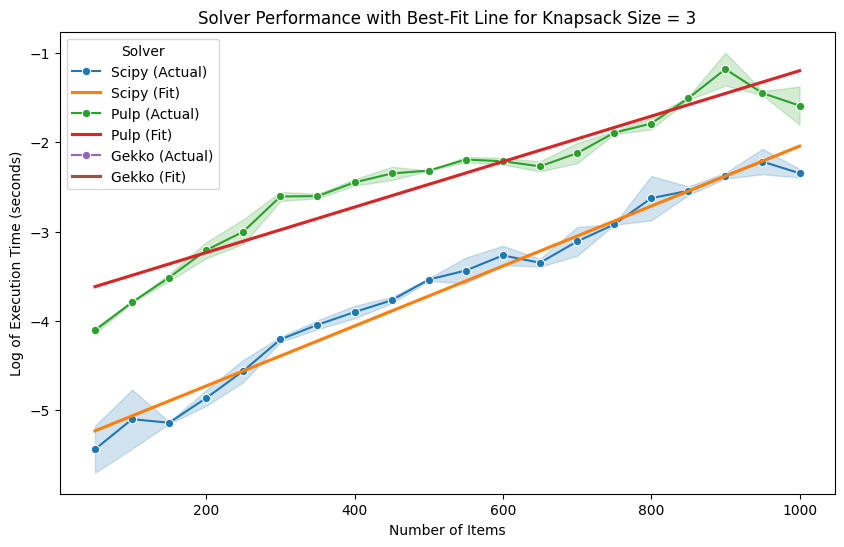

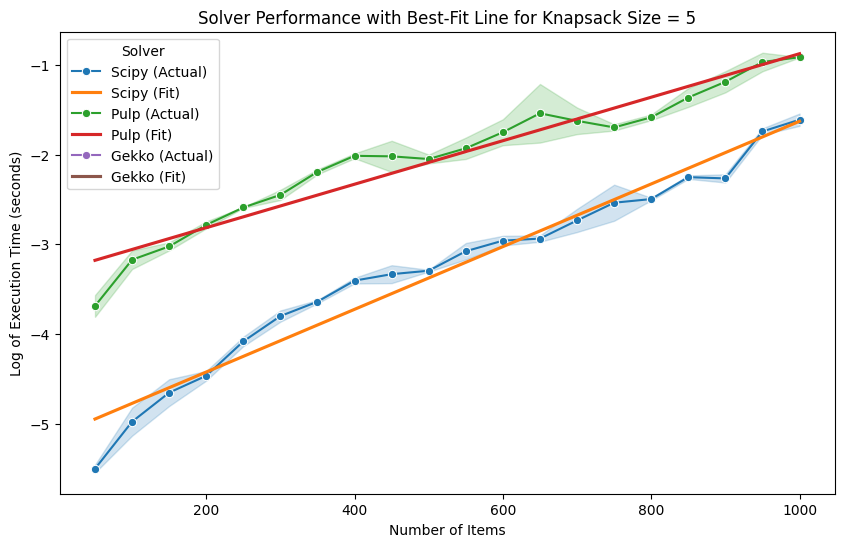

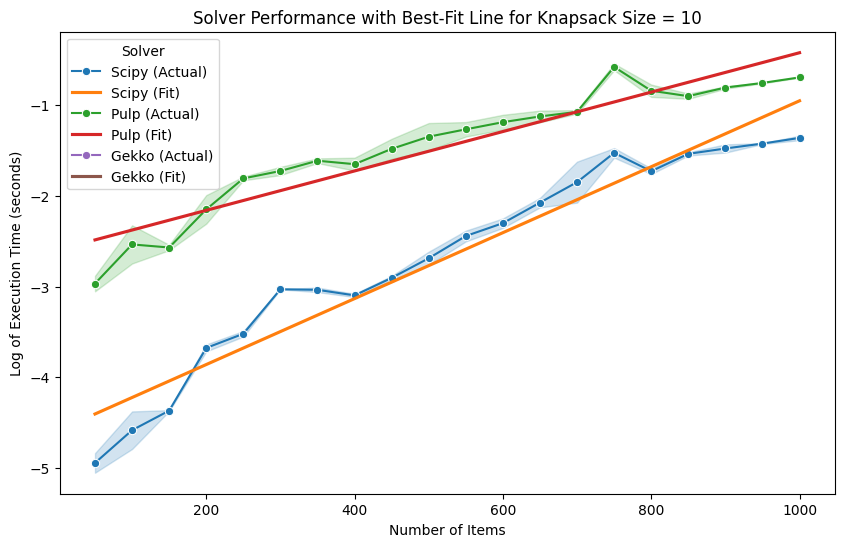

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_solver_performance_with_fit(df):
    # Create a new DataFrame to hold the log-transformed execution times
    df_log = df.copy()
    solvers = ['Scipy', 'Pulp', 'Gekko']  # List of solvers

    # Take the logarithm of the execution times
    for solver in solvers:
        df_log[solver] = np.log(df_log[solver])

    knapsack_sizes = df['NumKnapsacks'].unique()  # Get unique knapsack sizes

    for knapsack_size in knapsack_sizes:
        # Filter the dataframe for each knapsack size
        df_filtered = df_log[df_log['NumKnapsacks'] == knapsack_size]

        # Create a plot for each knapsack size
        plt.figure(figsize=(10, 6))

        # Plot each solver's actual performance using lineplot
        for solver in solvers:
            sns.lineplot(data=df_filtered, x='NumItems', y=solver, label=f'{solver} (Actual)', marker='o')

            # Fit a regression line for the log-transformed execution times
            sns.regplot(data=df_filtered, x='NumItems', y=solver, scatter=False, label=f'{solver} (Fit)', ci=None)

        # Set plot title and labels
        plt.title(f"Solver Performance with Best-Fit Line for Knapsack Size = {knapsack_size}")
        plt.xlabel("Number of Items")
        plt.ylabel("Log of Execution Time (seconds)")
        plt.legend(title="Solver")
        plt.show()

# Example call:
plot_solver_performance_with_fit(df_results)


# Heuristics single knapsack

In [ ]:
import numpy as np
import random
import time
from scipy.optimize import linprog
import pulp
from gekko import GEKKO
import matplotlib.pyplot as plt

In [ ]:
# Function to generate knapsack problem data
def generate_knapsack(n_items, max_weight=100, max_value=100):
    weights = np.random.randint(1, max_weight, size=n_items)
    values = np.random.randint(1, max_value, size=n_items)
    capacity = int(0.5 * sum(weights))  # Example: capacity is 50% of total weights
    return weights, values, capacity


In [ ]:
# Solver using SciPy
def solve_knapsack_scipy(weights, values, capacity):
    start_time = time.time()
    n = len(weights)
    c = -values  # Maximizing values is equivalent to minimizing -values
    A = [weights]
    b = [capacity]
    bounds = [(0, 1) for _ in range(n)]
    res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})
    end_time = time.time()
    return end_time - start_time

# Solver using PuLP
def solve_knapsack_pulp(weights, values, capacity):
    start_time = time.time()
    n = len(weights)
    prob = pulp.LpProblem("Knapsack", pulp.LpMaximize)
    x = [pulp.LpVariable(f'x{i}', cat='Binary') for i in range(n)]

    prob += pulp.lpSum([values[i] * x[i] for i in range(n)])
    prob += pulp.lpSum([weights[i] * x[i] for i in range(n)]) <= capacity

    prob.solve()
    end_time = time.time()
    return end_time - start_time

# Solver using GEKKO
def solve_knapsack_gekko(weights, values, capacity):
    start_time = time.time()
    m = GEKKO(remote=False)
    n = len(weights)
    x = [m.Var(integer=True, lb=0, ub=1) for _ in range(n)]

    m.Maximize(m.sum([values[i] * x[i] for i in range(n)]))
    m.Equation(m.sum([weights[i] * x[i] for i in range(n)]) <= capacity)

    m.options.SOLVER = 1  # APOPT
    m.solve(disp=False)
    end_time = time.time()
    return end_time - start_time


In [ ]:
# Greedy Algorithm
def solve_knapsack_greedy(weights, values, capacity):
    start_time = time.time()
    n = len(weights)
    ratio = [(values[i] / weights[i], i) for i in range(n)]
    ratio.sort(reverse=True, key=lambda x: x[0])

    total_value = 0
    total_weight = 0

    for r, i in ratio:
        if total_weight + weights[i] <= capacity:
            total_value += values[i]
            total_weight += weights[i]

    end_time = time.time()
    return end_time - start_time

# Dynamic Programming Algorithm
def solve_knapsack_dp(weights, values, capacity):
    start_time = time.time()
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    end_time = time.time()
    return end_time - start_time

# Simulated Annealing
def solve_knapsack_sa(weights, values, capacity, initial_temp=1000, cooling_rate=0.99, max_iter=1000):
    start_time = time.time()
    n = len(weights)
    current_solution = [random.choice([0, 1]) for _ in range(n)]

    def total_value(solution):
        total_weight = sum(weights[i] * solution[i] for i in range(n))
        if total_weight > capacity:
            return 0  # Penalty for exceeding capacity
        return sum(values[i] * solution[i] for i in range(n))

    best_solution = current_solution[:]
    best_value = total_value(best_solution)
    current_temp = initial_temp

    for _ in range(max_iter):
        i = random.randint(0, n - 1)
        current_solution[i] = 1 - current_solution[i]  # Flip the bit

        new_value = total_value(current_solution)
        if new_value > best_value or random.random() < np.exp((new_value - best_value) / current_temp):
            best_solution = current_solution[:]
            best_value = new_value

        current_temp *= cooling_rate

    end_time = time.time()
    return end_time - start_time

In [ ]:
# Define problem sizes
problem_sizes = range(50, 1001, 50)

# Initialize lists to store execution times
times_scipy = []
times_pulp = []
times_gekko = []
times_greedy = []
times_dp = []
times_sa = []

# Measure times for each problem size
for size in problem_sizes:
    weights, values, capacity = generate_knapsack(size)
    print(f"Problem size: {size}")

    # Measure SciPy
    try:
        time_scipy = solve_knapsack_scipy(weights, values, capacity)
    except Exception as e:
        print(f"SciPy failed for size {size}: {e}")
        time_scipy = None
    times_scipy.append(time_scipy)

    # Measure PuLP
    try:
        time_pulp = solve_knapsack_pulp(weights, values, capacity)
    except Exception as e:
        print(f"PuLP failed for size {size}: {e}")
        time_pulp = None
    times_pulp.append(time_pulp)

    # Measure GEKKO
    try:
        time_gekko = solve_knapsack_gekko(weights, values, capacity)
    except Exception as e:
        print(f"GEKKO failed for size {size}: {e}")
        time_gekko = None
    times_gekko.append(time_gekko)

    # Measure Greedy
    try:
        time_greedy = solve_knapsack_greedy(weights, values, capacity)
    except Exception as e:
        print(f"Greedy failed for size {size}: {e}")
        time_greedy = None
    times_greedy.append(time_greedy)

    # Measure Dynamic Programming
    try:
        time_dp = solve_knapsack_dp(weights, values, capacity)
    except Exception as e:
        print(f"DP failed for size {size}: {e}")
        time_dp = None
    times_dp.append(time_dp)

    # Measure Simulated Annealing
    try:
        time_sa = solve_knapsack_sa(weights, values, capacity)
    except Exception as e:
        print(f"Simulated Annealing failed for size {size}: {e}")
        time_sa = None
    times_sa.append(time_sa)


Problem size: 50


<ipython-input-24-b5f13a4dcb88>:9: OptimizeWarning: Unrecognized options detected: {'integrality': 1}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})


Problem size: 100
Problem size: 150
Problem size: 200
Problem size: 250
Problem size: 300
Problem size: 350
Problem size: 400
Problem size: 450
Problem size: 500
Problem size: 550
Problem size: 600
Problem size: 650
Problem size: 700
Problem size: 750
Problem size: 800
Problem size: 850
Problem size: 900
Problem size: 950
Problem size: 1000


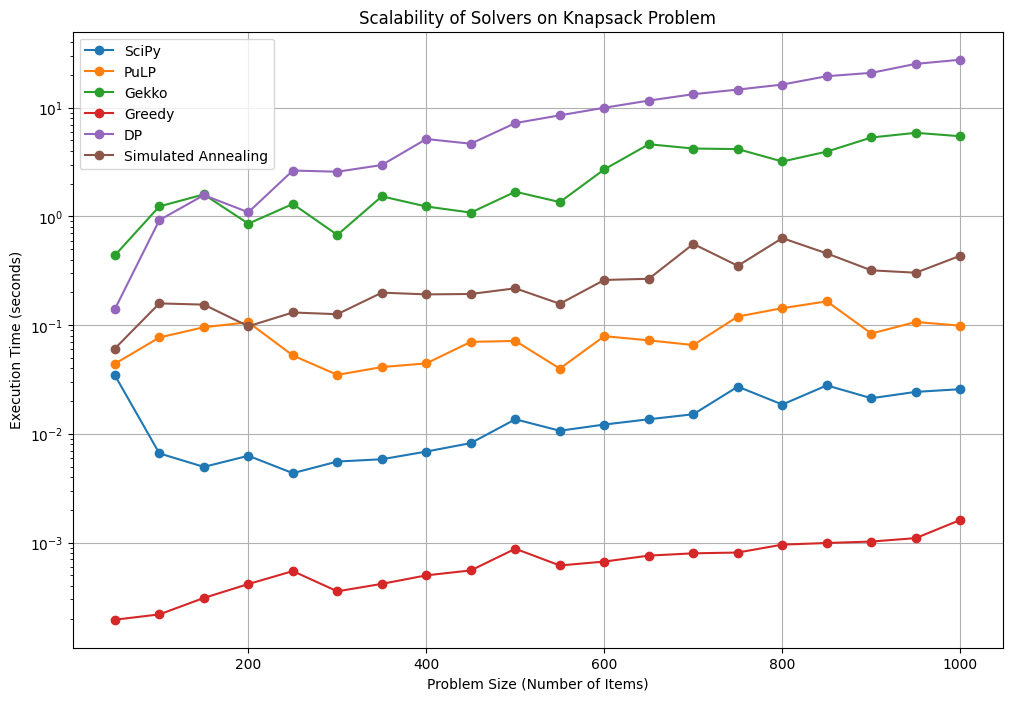

In [ ]:
plt.figure(figsize=(12, 8))
for solver, times in zip(['SciPy', 'PuLP', 'Gekko', 'Greedy', 'DP', 'Simulated Annealing'], [times_scipy, times_pulp, times_gekko, times_greedy, times_dp, times_sa]):
    plt.plot(problem_sizes, times, marker='o', label=solver)

plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability of Solvers on Knapsack Problem')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale if execution times vary widely
plt.show()


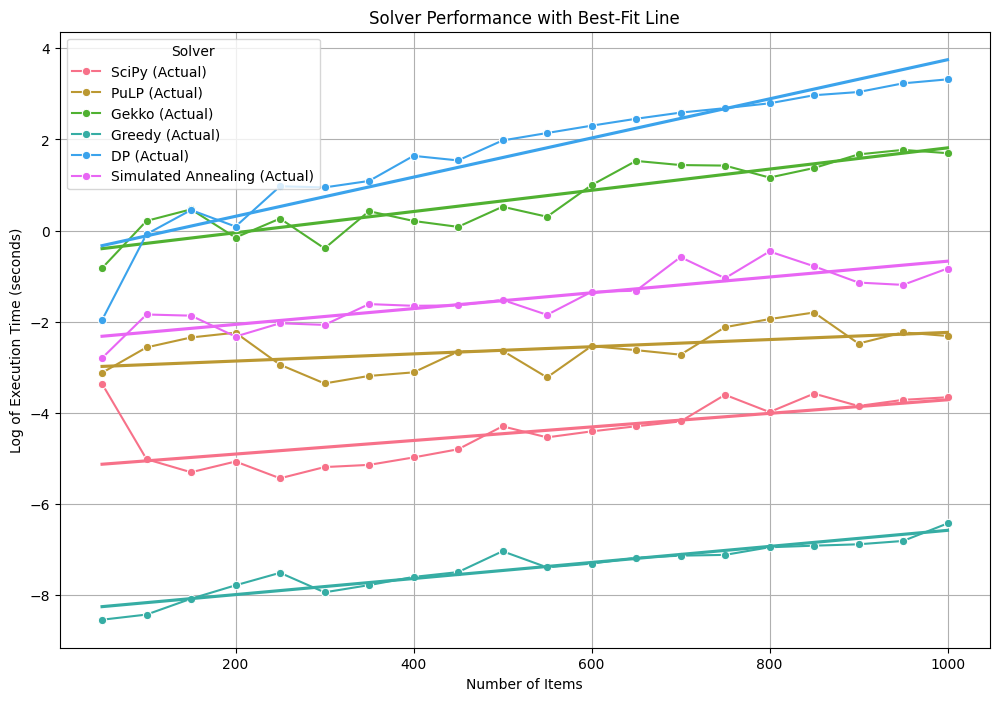

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_solver_performance_with_fit(num_items, times_scipy, times_pulp, times_gekko, times_greedy, times_dp, times_sa):
    # Combine the execution times into a single dictionary for plotting
    times = {
        'SciPy': np.log(times_scipy),
        'PuLP': np.log(times_pulp),
        'Gekko': np.log(times_gekko),
        'Greedy': np.log(times_greedy),
        'DP': np.log(times_dp),
        'Simulated Annealing': np.log(times_sa)
    }

    # Convert num_items to a NumPy array for proper indexing
    num_items_array = np.array(num_items)

    # Create a plot for the specified knapsack size
    plt.figure(figsize=(12, 8))

    # Set color palette for different solvers
    palette = sns.color_palette("husl", len(times))  # Using a qualitative palette for distinct colors

    # Plot each solver's actual performance using lineplot and fit a regression line
    for i, (solver, execution_times) in enumerate(times.items()):
        # Ensure that we are only plotting valid times (excluding any None or negative values)
        valid_indices = np.isfinite(execution_times)
        if np.any(valid_indices):
            # Plot actual performance
            sns.lineplot(x=num_items_array[valid_indices], y=execution_times[valid_indices],
                         label=f'{solver} (Actual)', marker='o', color=palette[i])

            # Fit a regression line for the log-transformed execution times
            sns.regplot(x=num_items_array[valid_indices], y=execution_times[valid_indices],
                        scatter=False, color=palette[i], ci=None)

    # Set plot title and labels
    plt.title("Solver Performance with Best-Fit Line")
    plt.xlabel("Number of Items")
    plt.ylabel("Log of Execution Time (seconds)")
    plt.legend(title="Solver")
    plt.grid(True)
    plt.show()

# Example call:
# Assuming num_items is a list of the number of items for each corresponding time list.
num_items = list(range(50, 1001, 50))  # Example number of items
plot_solver_performance_with_fit(num_items, times_scipy, times_pulp, times_gekko, times_greedy, times_dp, times_sa)


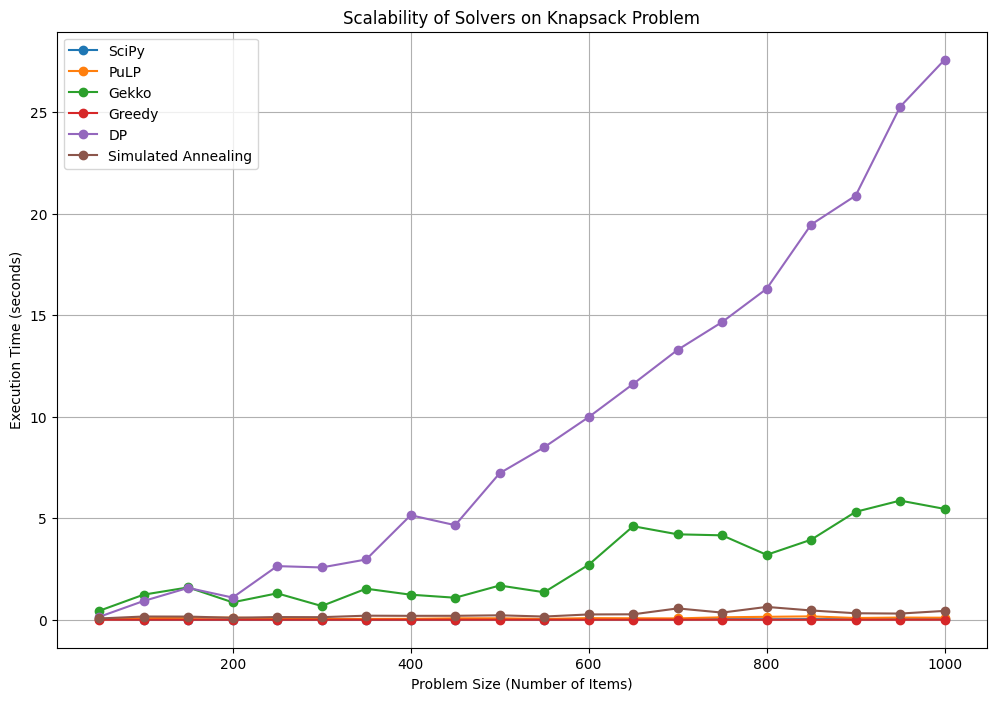

In [ ]:
plt.figure(figsize=(12, 8))
for solver, times in zip(['SciPy', 'PuLP', 'Gekko', 'Greedy', 'DP', 'Simulated Annealing'], [times_scipy, times_pulp, times_gekko, times_greedy, times_dp, times_sa]):
    plt.plot(problem_sizes, times, marker='o', label=solver)

plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability of Solvers on Knapsack Problem')
plt.legend()
plt.grid(True)
# plt.yscale('log')  # Log scale if execution times vary widely
plt.show()


In [ ]:
# Define problem sizes
problem_sizes = range(50, 1001, 10)

# Initialize lists to store execution times
times_scipy1 = []
times_pulp1 = []
times_gekko1 = []
times_greedy1 = []
times_dp1 = []
times_sa1 = []

# Measure times for each problem size
for size in problem_sizes:
    weights, values, capacity = generate_knapsack(size)
    print(f"Problem size: {size}")

    # Measure SciPy
    try:
        time_scipy = solve_knapsack_scipy(weights, values, capacity)
    except Exception as e:
        print(f"SciPy failed for size {size}: {e}")
        time_scipy = None
    times_scipy1.append(time_scipy)

    # Measure PuLP
    try:
        time_pulp = solve_knapsack_pulp(weights, values, capacity)
    except Exception as e:
        print(f"PuLP failed for size {size}: {e}")
        time_pulp = None
    times_pulp1.append(time_pulp)

    # Measure GEKKO
    try:
        time_gekko = solve_knapsack_gekko(weights, values, capacity)
    except Exception as e:
        print(f"GEKKO failed for size {size}: {e}")
        time_gekko = None
    times_gekko1.append(time_gekko)

    # Measure Greedy
    try:
        time_greedy = solve_knapsack_greedy(weights, values, capacity)
    except Exception as e:
        print(f"Greedy failed for size {size}: {e}")
        time_greedy = None
    times_greedy1.append(time_greedy)

    # Measure Dynamic Programming
    try:
        time_dp = solve_knapsack_dp(weights, values, capacity)
    except Exception as e:
        print(f"DP failed for size {size}: {e}")
        time_dp = None
    times_dp1.append(time_dp)

    # Measure Simulated Annealing
    try:
        time_sa = solve_knapsack_sa(weights, values, capacity)
    except Exception as e:
        print(f"Simulated Annealing failed for size {size}: {e}")
        time_sa = None
    times_sa1.append(time_sa)


Problem size: 50


<ipython-input-24-b5f13a4dcb88>:9: OptimizeWarning: Unrecognized options detected: {'integrality': 1}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs', options={'integrality': 1})


Problem size: 60
Problem size: 70
Problem size: 80
Problem size: 90
Problem size: 100
Problem size: 110
Problem size: 120
Problem size: 130
Problem size: 140
Problem size: 150
Problem size: 160
Problem size: 170
Problem size: 180
Problem size: 190
Problem size: 200
Problem size: 210
Problem size: 220
Problem size: 230
Problem size: 240
Problem size: 250
Problem size: 260
Problem size: 270
Problem size: 280
Problem size: 290
Problem size: 300
Problem size: 310
Problem size: 320
Problem size: 330
Problem size: 340
Problem size: 350
Problem size: 360
Problem size: 370
Problem size: 380
Problem size: 390
Problem size: 400
Problem size: 410
Problem size: 420
Problem size: 430
Problem size: 440
Problem size: 450
Problem size: 460
Problem size: 470
Problem size: 480
Problem size: 490
Problem size: 500
Problem size: 510
Problem size: 520
Problem size: 530
Problem size: 540
Problem size: 550
Problem size: 560
Problem size: 570
Problem size: 580
Problem size: 590
Problem size: 600
Problem size: 

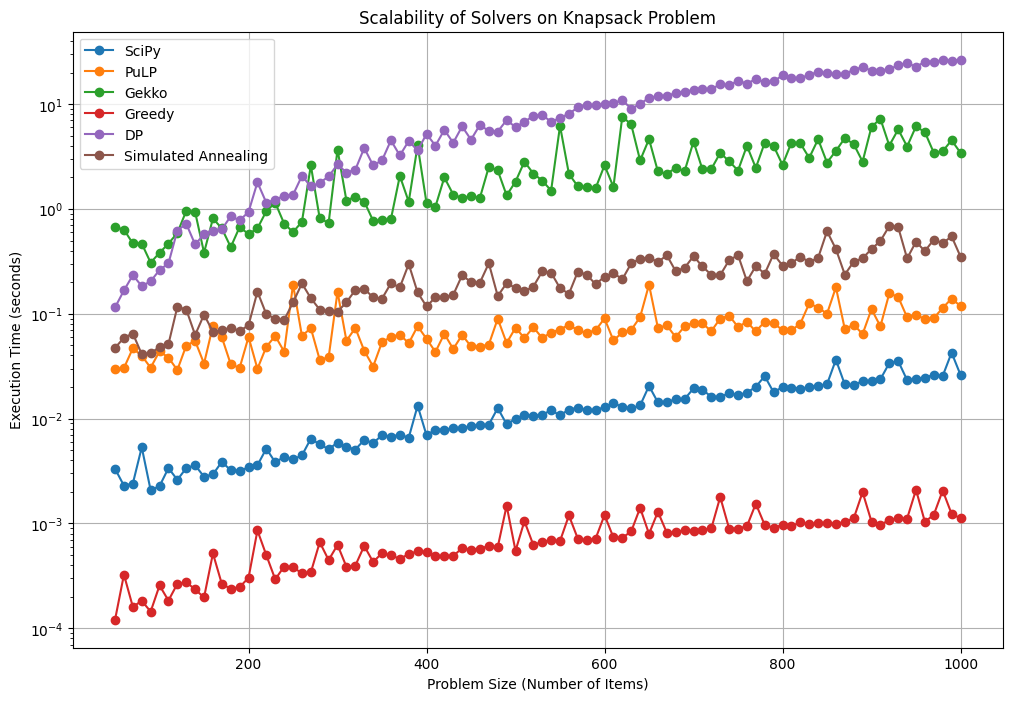

In [ ]:
plt.figure(figsize=(12, 8))
for solver, times in zip(['SciPy', 'PuLP', 'Gekko', 'Greedy', 'DP', 'Simulated Annealing'], [times_scipy1, times_pulp1, times_gekko1, times_greedy1, times_dp1, times_sa1]):
    plt.plot(problem_sizes, times, marker='o', label=solver)

plt.xlabel('Problem Size (Number of Items)')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability of Solvers on Knapsack Problem')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale if execution times vary widely
plt.show()


In [ ]:
import numpy as np
import random
import time
from scipy.optimize import linprog
import pulp
from gekko import GEKKO
import matplotlib.pyplot as plt

# Function to generate knapsack problem data
def generate_knapsack(n_items, max_weight=100, max_value=100):
    weights = np.random.randint(1, max_weight, size=n_items)
    values = np.random.randint(1, max_value, size=n_items)
    capacity = int(0.5 * sum(weights))  # Example: capacity is 50% of total weights
    return weights, values, capacity

# Function to calculate total value for a given solution
def calculate_total_value(weights, values, solution):
    return sum(values[i] * solution[i] for i in range(len(weights)))

# Solver using PuLP to get the optimal solution and value
def get_optimal_value_pulp(weights, values, capacity):
    n = len(weights)
    prob = pulp.LpProblem("Knapsack", pulp.LpMaximize)
    x = [pulp.LpVariable(f'x{i}', cat='Binary') for i in range(n)]
    prob += pulp.lpSum([values[i] * x[i] for i in range(n)])
    prob += pulp.lpSum([weights[i] * x[i] for i in range(n)]) <= capacity
    prob.solve()
    optimal_value = sum(values[i] * pulp.value(x[i]) for i in range(n) if pulp.value(x[i]) is not None)
    return optimal_value

# Greedy Algorithm
def solve_knapsack_greedy(weights, values, capacity):
    n = len(weights)
    ratio = [(values[i] / weights[i], i) for i in range(n)]
    ratio.sort(reverse=True, key=lambda x: x[0])

    total_value = 0
    total_weight = 0
    solution = [0] * n

    for r, i in ratio:
        if total_weight + weights[i] <= capacity:
            solution[i] = 1
            total_value += values[i]
            total_weight += weights[i]

    return total_value

# Dynamic Programming Algorithm
def solve_knapsack_dp(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]

# Simulated Annealing
def solve_knapsack_sa(weights, values, capacity, initial_temp=1000, cooling_rate=0.99, max_iter=1000):
    n = len(weights)
    current_solution = [random.choice([0, 1]) for _ in range(n)]

    def total_value(solution):
        total_weight = sum(weights[i] * solution[i] for i in range(n))
        if total_weight > capacity:
            return 0  # Penalty for exceeding capacity
        return sum(values[i] * solution[i] for i in range(n))

    best_solution = current_solution[:]
    best_value = total_value(best_solution)
    current_temp = initial_temp

    for _ in range(max_iter):
        i = random.randint(0, n - 1)
        current_solution[i] = 1 - current_solution[i]  # Flip the bit

        new_value = total_value(current_solution)
        if new_value > best_value or random.random() < np.exp((new_value - best_value) / current_temp):
            best_solution = current_solution[:]
            best_value = new_value

        current_temp *= cooling_rate

    return best_value

# Calculate accuracy of heuristic algorithms
def measure_accuracy(optimal_value, heuristic_value):
    relative_error = (optimal_value - heuristic_value) / optimal_value
    percentage_accuracy = (heuristic_value / optimal_value) * 100
    return relative_error, percentage_accuracy



In [ ]:
# Lists to store execution times and accuracy metrics
problem_sizes = range(50, 1001, 50)  # Smaller range for easier testing
times_pulp = []
times_greedy = []
times_dp = []
times_sa = []
accuracy_greedy = []
accuracy_dp = []
accuracy_sa = []
relative_greedy = []
relative_dp = []
relative_sa = []

# Measure times and calculate accuracy for each problem size
for size in problem_sizes:
    weights, values, capacity = generate_knapsack(size)
    print(f"Problem size: {size}")

    # Get optimal value using PuLP
    optimal_value = get_optimal_value_pulp(weights, values, capacity)

    # Measure Greedy
    start_time = time.time()
    heuristic_value_greedy = solve_knapsack_greedy(weights, values, capacity)
    times_greedy.append(time.time() - start_time)
    relative_accuracy_greedy, percentage_accuracy_greedy = measure_accuracy(optimal_value, heuristic_value_greedy)
    accuracy_greedy.append(percentage_accuracy_greedy)
    relative_greedy.append(relative_accuracy_greedy)

    # Measure Dynamic Programming
    start_time = time.time()
    heuristic_value_dp = solve_knapsack_dp(weights, values, capacity)
    times_dp.append(time.time() - start_time)
    relative_accuracy_dp, percentage_accuracy_dp = measure_accuracy(optimal_value, heuristic_value_dp)
    accuracy_dp.append(percentage_accuracy_dp)
    relative_dp.append(relative_accuracy_dp)

    # Measure Simulated Annealing
    start_time = time.time()
    heuristic_value_sa = solve_knapsack_sa(weights, values, capacity)
    times_sa.append(time.time() - start_time)
    relative_accuracy_sa, percentage_accuracy_sa = measure_accuracy(optimal_value, heuristic_value_sa)
    accuracy_sa.append(percentage_accuracy_sa)
    relative_sa.append(relative_accuracy_sa)



Problem size: 50
Problem size: 100
Problem size: 150
Problem size: 200
Problem size: 250
Problem size: 300
Problem size: 350
Problem size: 400
Problem size: 450
Problem size: 500
Problem size: 550
Problem size: 600
Problem size: 650
Problem size: 700
Problem size: 750
Problem size: 800
Problem size: 850
Problem size: 900
Problem size: 950
Problem size: 1000


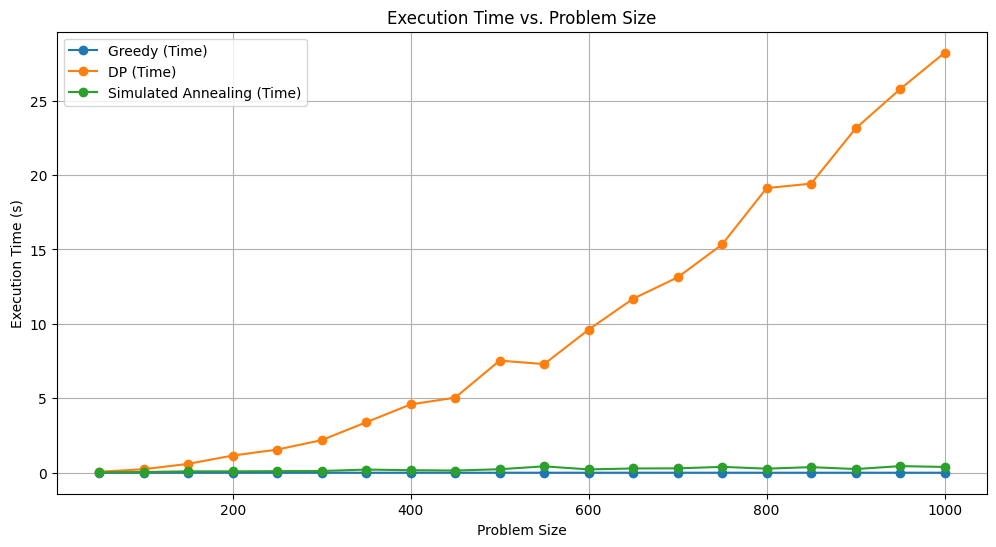

In [ ]:
# Plot Execution Times
plt.figure(figsize=(12, 6))
plt.plot(problem_sizes, times_greedy, label="Greedy (Time)", marker='o')
plt.plot(problem_sizes, times_dp, label="DP (Time)", marker='o')
plt.plot(problem_sizes, times_sa, label="Simulated Annealing (Time)", marker='o')
plt.xlabel("Problem Size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. Problem Size")
plt.legend()
plt.grid(True)
plt.show()


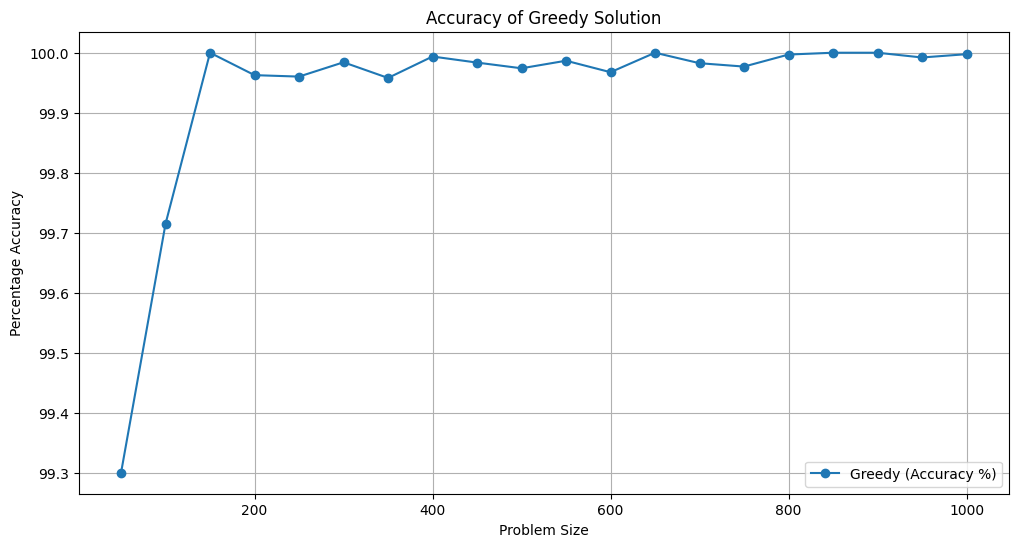

In [ ]:

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(problem_sizes, accuracy_greedy, label="Greedy (Accuracy %)", marker='o')
# plt.plot(problem_sizes, accuracy_dp, label="DP (Accuracy %)", marker='o')
# plt.plot(problem_sizes, accuracy_sa, label="Simulated Annealing (Accuracy %)", marker='o')
plt.xlabel("Problem Size")
plt.ylabel("Percentage Accuracy")
plt.title("Accuracy of Greedy Solution")
plt.legend()
plt.grid(True)
plt.show()


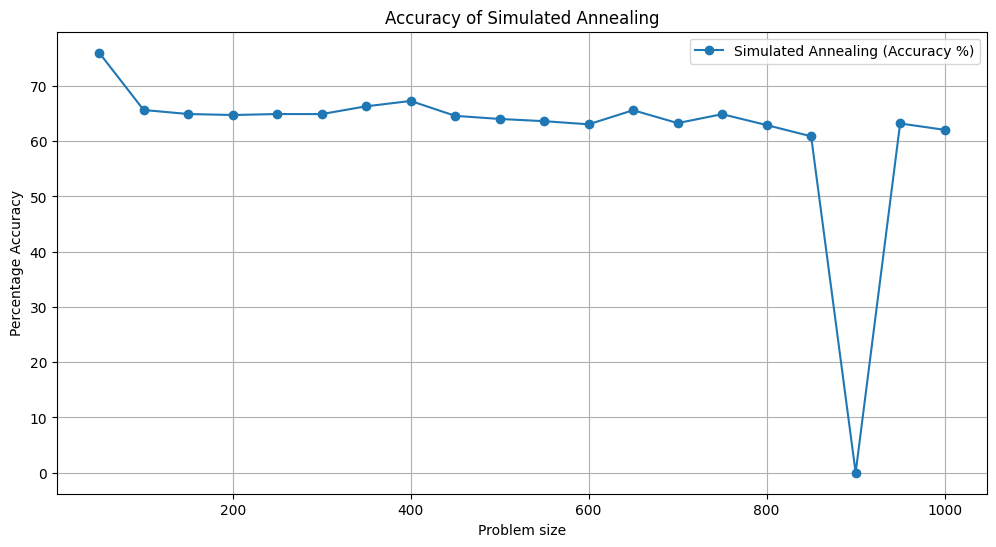

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12, 6))
# plt.plot(problem_sizes, accuracy_greedy, label="Greedy (Accuracy %)", marker='o')
# plt.plot(problem_sizes, accuracy_dp, label="DP (Accuracy %)", marker='o')
plt.plot(problem_sizes, accuracy_sa, label="Simulated Annealing (Accuracy %)", marker='o')
plt.xlabel("Problem size")
plt.ylabel("Percentage Accuracy")
plt.title("Accuracy of Simulated Annealing")
plt.legend()
plt.grid(True)
plt.show()


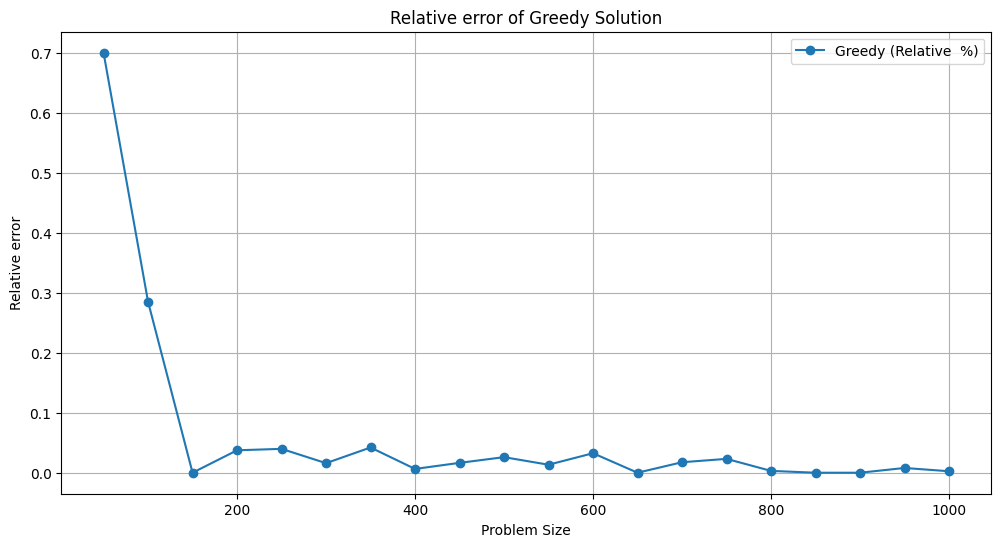

In [ ]:

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(problem_sizes, 100*np.array(relative_greedy), label="Greedy (Relative  %)", marker='o')
# plt.plot(problem_sizes, accuracy_dp, label="DP (Accuracy %)", marker='o')
# plt.plot(problem_sizes, accuracy_sa, label="Simulated Annealing (Accuracy %)", marker='o')
plt.xlabel("Problem Size")
plt.ylabel("Relative error")
plt.title("Relative error of Greedy Solution")
plt.legend()
plt.grid(True)
plt.show()


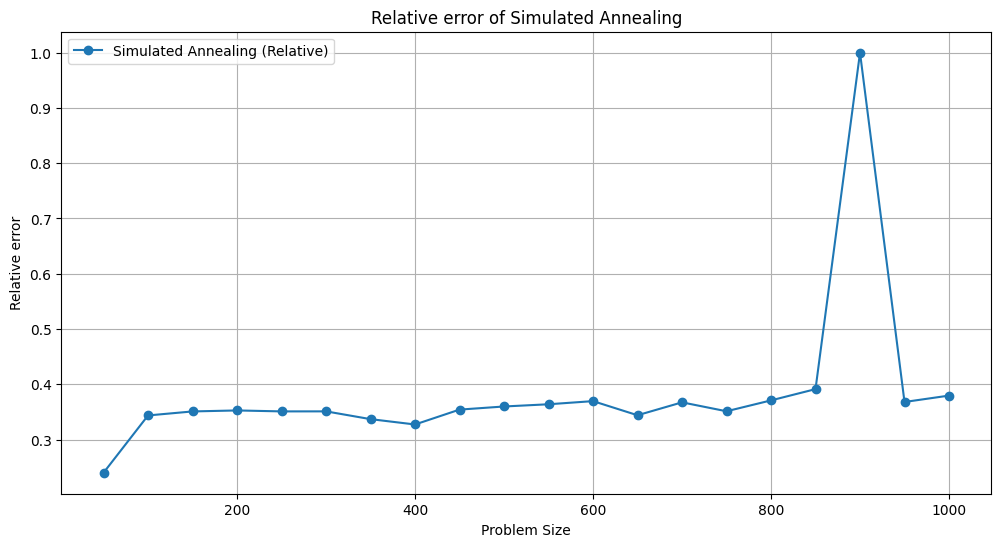

In [ ]:

# Plot Accuracy
plt.figure(figsize=(12, 6))
# plt.plot(problem_sizes, relative_greedy, label="Greedy (Relative  %)", marker='o')
# plt.plot(problem_sizes, accuracy_dp, label="DP (Accuracy %)", marker='o')
plt.plot(problem_sizes, relative_sa, label="Simulated Annealing (Relative)", marker='o')
plt.xlabel("Problem Size")
plt.ylabel("Relative error")
plt.title("Relative error of Simulated Annealing")
plt.legend()
plt.grid(True)
plt.show()


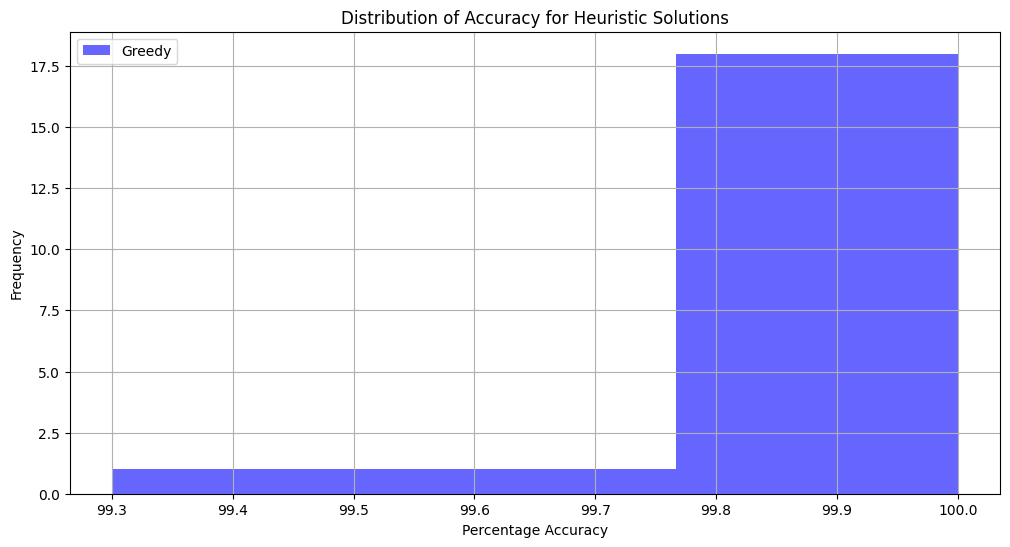

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(accuracy_greedy, bins=3, alpha=0.6, label="Greedy", color='blue')
# plt.hist(accuracy_dp, bins=10, alpha=0.6, label="DP", color='green')
# plt.hist(accuracy_sa, bins=10, alpha=0.6, label="Simulated Annealing", color='red')
plt.xlabel("Percentage Accuracy")
plt.ylabel("Frequency")
plt.title("Distribution of Accuracy for Heuristic Solutions")
plt.legend()
plt.grid(True)
plt.show()